In [3]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('documents/titanic.csv',sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# set passengerID as index
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Fare'>

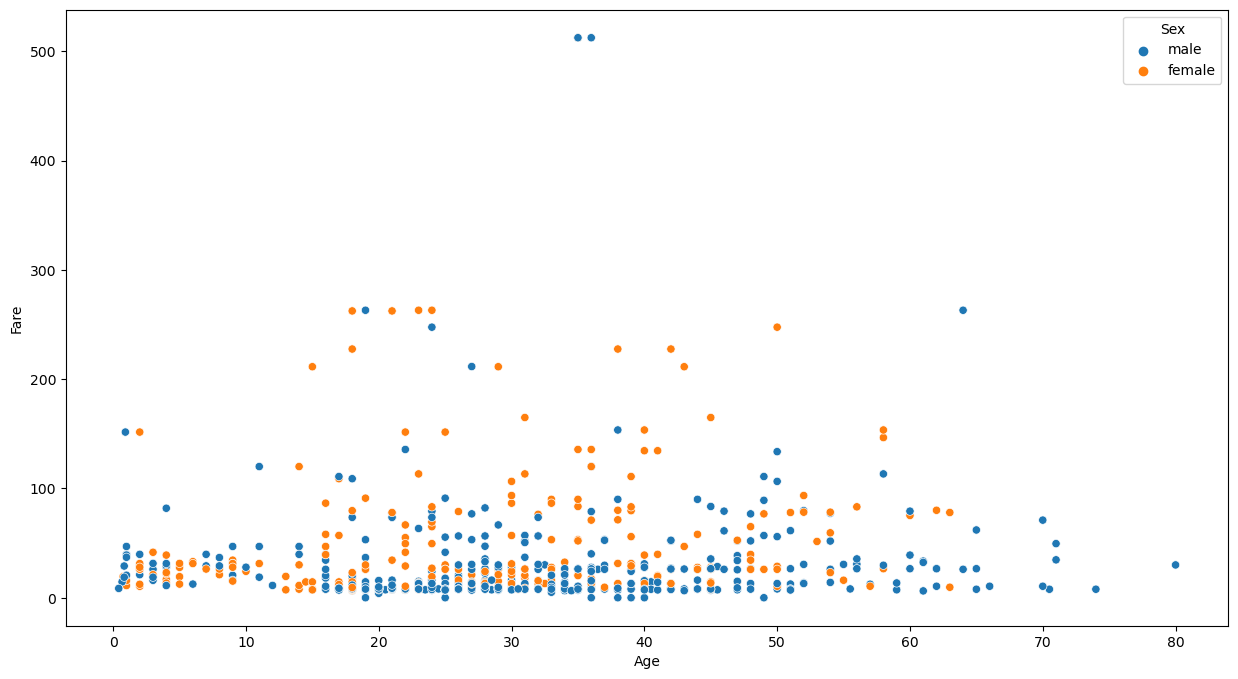

In [58]:
# create a scatter plot with fare payed and age based on gender
plt.figure(figsize=(15,8))
sb.scatterplot(data=titanic,x='Age',y='Fare',hue='Sex')

In [6]:
# how many people survived
(titanic['Survived'] == 'female').count()

891

<AxesSubplot:xlabel='Fare', ylabel='Count'>

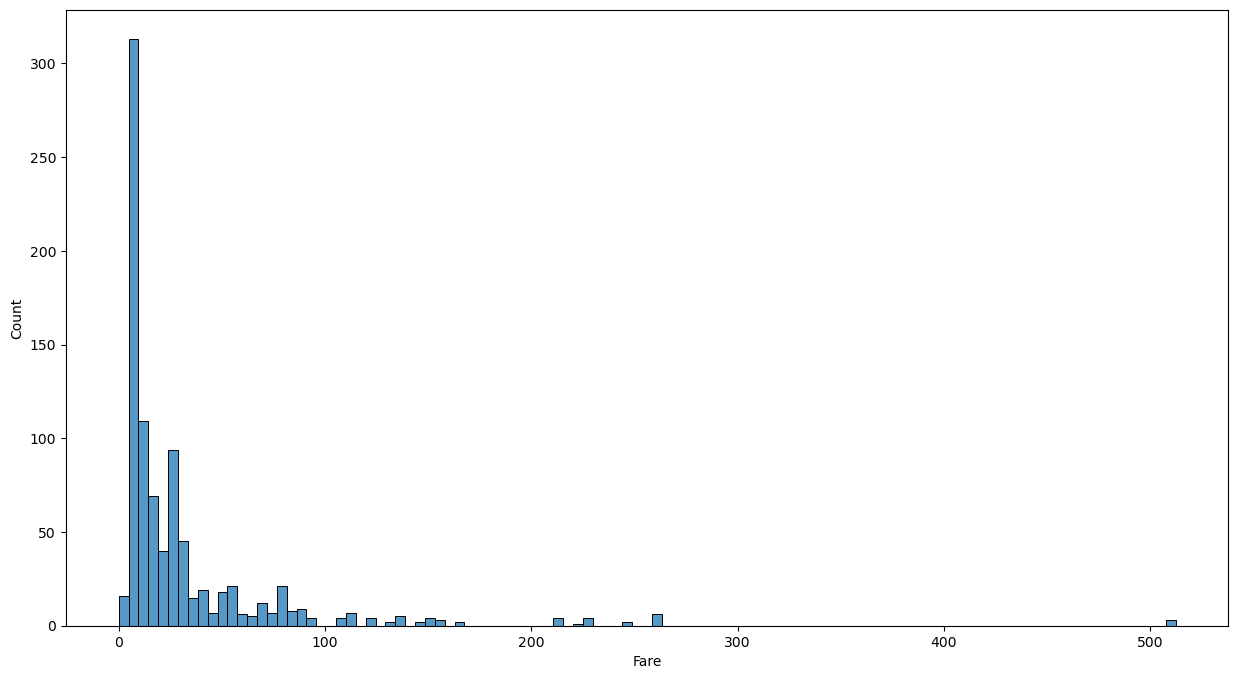

In [59]:
# create a histogram with fare payed and sort the values from top to least
plt.figure(figsize=(15,8))
bx = titanic['Fare'].sort_values(ascending=True)
sb.histplot(bx)

In [5]:
chip = pd.read_csv('documents/chipotle.tsv',sep='\t')
chip.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
# numb of obs in chip
chip.shape

(4622, 5)

In [7]:
# how is chip indexed
chip.index

RangeIndex(start=0, stop=4622, step=1)

In [17]:
# most ordered item in the choice_description col
chip['choice_description'].value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [14]:
# find the amount of items sold individually
chip['item_name'].value_counts().count()

50

In [61]:
chip[['quantity','item_name']].value_counts()

quantity  item_name                   
1         Chicken Bowl                    693
          Chicken Burrito                 521
          Chips and Guacamole             455
          Steak Burrito                   352
          Canned Soft Drink               264
                                         ... 
2         Steak Crispy Tacos                1
          Steak Soft Tacos                  1
          Veggie Soft Tacos                 1
3         Bowl                              1
15        Chips and Fresh Tomato Salsa      1
Length: 103, dtype: int64

In [13]:
# amount of items were ordered in total
chip.item_name.count()

4622

In [16]:
# most ordered item in the choice_description col
chip.groupby(by='choice_description').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
